In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/drive/My Drive/eye_resize(224,224)/"
CATEGORIES = ["central", "hemianopia","normal","quadratopia","superior","turnel"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array ,cv2.IMREAD_GRAYSCALE
        #plt.imshow(img_array, cmap='gray')  # graph it
        #plt.show()  # display!

        break  # we just want one for now so break
    break 

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array ,cv2.IMREAD_GRAYSCALE
            new_array = cv2.resize(img_array, (32, 32))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data

create_training_data()

print(len(training_data))

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

model_history = []
acc = []

for i in range(5):
  print("Training fold:", i+1)
  X, y = shuffle(X, y, random_state=0)
  X = []
  y = []

  for features,label in training_data:
      X.append(features)
      y.append(label)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

  x_train = np.asarray(X_train,dtype=np.float32)/255.0
  #print("image shape:",x_train[0].shape)
  y_train = keras.utils.to_categorical(y_train, num_classes=6, dtype='float32')
  x_test = np.asarray(X_test,dtype=np.float32)/255.0
  #print("image shape:",x_test[0].shape)
  y_test2 = keras.utils.to_categorical(y_test, num_classes=6, dtype='float32')
  #add dimentional
  x_train = x_train[...,np.newaxis]
  x_test2 = x_test[...,np.newaxis]

  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(6, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

  history = model.fit(x_train,y_train,validation_data=(x_test2,y_test2),batch_size=32,epochs=50)
  score=model.evaluate(x_test2,y_test2,verbose=0)
  print("accuracy = ",score[1])
  acc.append(score[1])
  model_history.append(history)

No handles with labels found to put in legend.


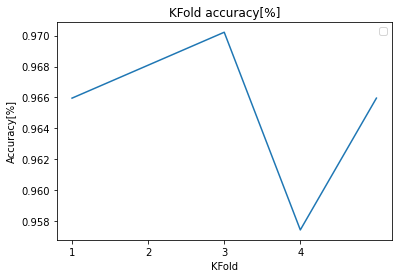

In [0]:
"""
plt.plot(history.history['loss'], label = "Train") 
plt.plot(history.history['val_loss'], label = "Validation")
plt.title("losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
plt.plot(history.history['accuracy'], label = "Train")
plt.plot(history.history['val_accuracy'], label = "Validation") 
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy[%]")
plt.legend()
plt.show()
"""
"""
plt.title('Train Accuracy vs Val Accuracy')
#plt.plot(model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
#plt.plot(model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
#plt.plot(model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
#plt.plot(model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
#plt.plot(model_history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
#plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
#plt.plot(model_history[3].history['accuracy'], label='Train Accuracy Fold 3', color='orange', )
#plt.plot(model_history[3].history['val_accuracy'], label='Val Accuracy Fold 3', color='orange', linestyle = "dashdot")
plt.plot(model_history[2].history['accuracy'], label='Train Accuracy', color='blue', )
plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy', color='red', linestyle = "dashdot")
plt.legend()
plt.show()
"""

print('accuracy=',(acc[0]+acc[1]+acc[2]+acc[3]+acc[4])/5)

plt.title('KFold accuracy[%]')
plt.plot([1,2,3,4,5],acc)
#ax=plt.subplot(111)
#ax.set_xlim(1,5)
dim=np.arange(1,5,1)
plt.xlabel("KFold")
plt.ylabel("Accuracy[%]")
plt.xticks(dim)
plt.legend()
plt.show()


In [0]:
"""
import glob

dir2 = sorted(glob.glob('/content/drive/My Drive/Sakura program/Sakura Sciences(Nishizaki sensei & Leow senpai)/defect_dataset1/crazing/*'))  

for path in dir2:  
  img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img,(32,32))
  img = np.asarray(img,dtype=np.float32)/255.0 
  #img = img[...,np.newaxis]
  img = np.reshape(img,[1,32,32,1])

  pred =np.argmax(model.predict(img)[0])
  if pred == 0:
    print("The predict image is = crazing")
  elif pred == 1:
    print("The predict image is = inclusion")
  elif pred == 2:
    print("The predict image is = patches")
  elif pred == 3:
    print("The predict image is = pitted surface")
  elif pred == 4:
    print("The predict image is = rolled in scale")
  elif pred == 5:
    print("The predict image is = scratches")
"""

from sklearn.metrics import classification_report
predictions = model.predict(x_test2)
predictions[0]
np.argmax(predictions[0])


pred=[]
for i in range(470):
	predictions[i]
	A=np.argmax(predictions[i])
	pred.append(A)

print(classification_report(pred,y_test,target_names=CATEGORIES))

